# Taxi Data Exploratory Analysis

**This note book do an exploratory analysis on curated taxi data**

**Read in the curated data**

In [6]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
df = pd.read_csv("../data/curated/yellowtaxi_curated_data.csv")
df.head()

,pickup_month,pickup_date,pickup_hour,trip_duration,weekend,weekday,morning_rush,evening_rush,trip_distance,pulocationid,dolocationid,payment_type,total_surcharge,fare_amount,tip_amount,tip_ratio
0,1,2020-01-01,0,4.800000,0,1,0,0,1.2,238,239,1,3.8,6.0,1.47,13.043478
1,1,2020-01-01,0,7.416667,0,1,0,0,1.2,239,238,1,3.8,7.0,1.50,12.195122
2,1,2020-01-01,0,6.183333,0,1,0,0,0.6,238,238,1,3.8,6.0,1.00,9.259259
3,1,2020-01-01,0,4.850000,0,1,0,0,0.8,238,151,1,1.3,5.5,1.36,16.666667
4,1,2020-01-01,0,11.450000,0,1,0,0,0.7,246,48,1,3.8,8.0,2.35,16.607774


**Analysis on pickup_month**

In [8]:
# Ensure only pickup_month of 1,2 and 3
df = df[df['pickup_month'].isin([1, 2, 3])]

# Count the number of pickups for each month
pickup_per_month = df['pickup_month'].value_counts().sort_index()
pickup_per_month

1    4642622
2    4656339
3    2187493
Name: pickup_month, dtype: int64

**Analysis on pickup_hour**


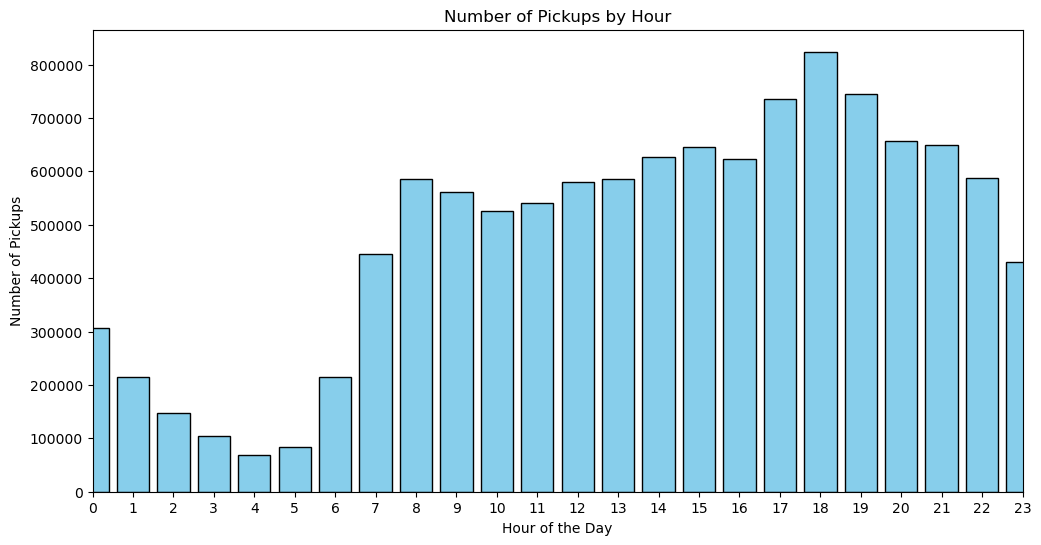

In [9]:
# Count the number of pickups per hour
pickup_per_hour = df['pickup_hour'].value_counts().sort_index()
pickup_per_hour

# Provided pickup_hours counts
pickup_hours_counts = {
    0: 306679,
    1: 215687,
    2: 147755,
    3: 103530,
    4: 68576,
    5: 83697,
    6: 215298,
    7: 445265,
    8: 585123,
    9: 561521,
    10: 526675,
    11: 539793,
    12: 579304,
    13: 585691,
    14: 627758,
    15: 645469,
    16: 623215,
    17: 734810,
    18: 824038,
    19: 743941,
    20: 657485,
    21: 648848,
    22: 586839,
    23: 429457
}

# Plotting the histogram using the provided counts
plt.figure(figsize=(12, 6))
plt.bar(pickup_hours_counts.keys(), pickup_hours_counts.values(), color='skyblue', edgecolor='black')

plt.title("Number of Pickups by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))
plt.xlim(0, 23)
plt.savefig('../plots/pre_analysis_pickup_count_all_location.png')
plt.show()


**Analysis on trip_duration**

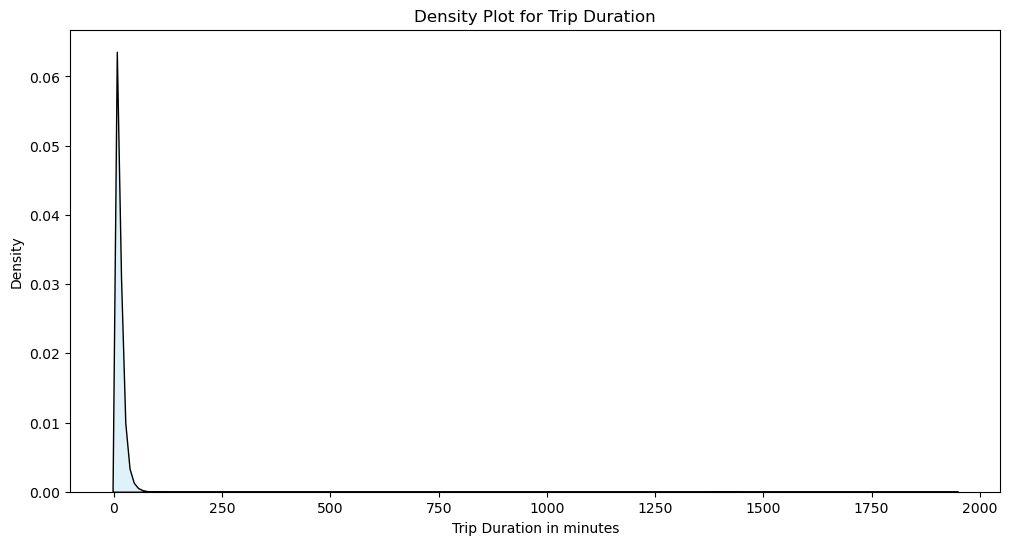

In [10]:
# Ensure trip duration is all positive
# Removing rows with negative trip_duration values
trip_duration_df = df[df['trip_duration'] >= 0]

# Plotting the density plot for trip_distance using filtered_df for demonstration
plt.figure(figsize=(12, 6))
sns.kdeplot(trip_duration_df['trip_duration'], fill=True, bw_adjust=0.5, color='skyblue', edgecolor='black')

plt.title("Density Plot for Trip Duration")
plt.xlabel("Trip Duration in minutes")
plt.ylabel("Density")

plt.show()


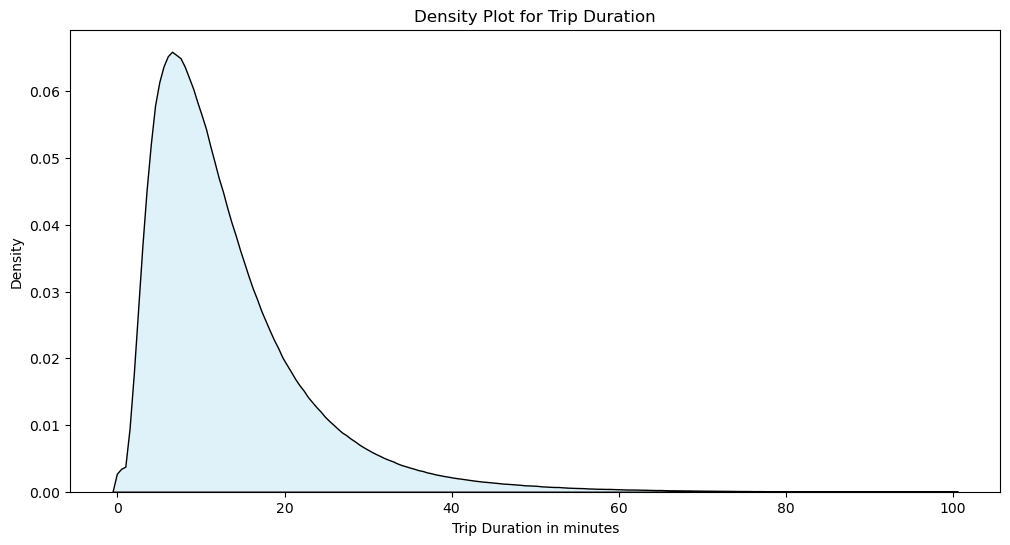

In [11]:
# Since most trip duration range from 0 to 100, we will narrow down our df and plot the density plot for trip distance again
# Filtering the dataframe to only include rows where trip_duration is between 0 and 100
filtered_trip_duration_df = trip_duration_df[trip_duration_df['trip_duration'].between(0, 100)]

# Plotting the density plot for the filtered trip_duration
plt.figure(figsize=(12, 6))
sns.kdeplot(filtered_trip_duration_df['trip_duration'], fill=True, bw_adjust=0.5, color='skyblue', edgecolor='black')

plt.title("Density Plot for Trip Duration")
plt.xlabel("Trip Duration in minutes")
plt.ylabel("Density")
plt.savefig('../plots/trip_duration_density_all_location.png')
plt.show()


**Analysis on weekend and weekday**

In [12]:
# Counting the number of trips where weekend = 1
weekend_trips = df[df['weekend'] == 1].shape[0]

# Counting the number of trips where weekday = 1
weekday_trips = df[df['weekday'] == 1].shape[0]

average_trip_perday_weekday = math.floor(weekday_trips/5)
average_trip_perday_weekend = math.floor(weekend_trips/2)

average_trip_perday_weekday, average_trip_perday_weekend

(1719141, 1445373)

**Analysis on morning rush and evening rush**

In [13]:
# Counting the number of trips where morning_rush = 1
morning_rush_trips = df[df['morning_rush'] == 1].shape[0]

# Counting the number of trips where evening_rush = 1
evening_rush_trips = df[df['evening_rush'] == 1].shape[0]

morning_rush_trips, evening_rush_trips

(1591909, 2302789)

**Analysis on trip_distance**

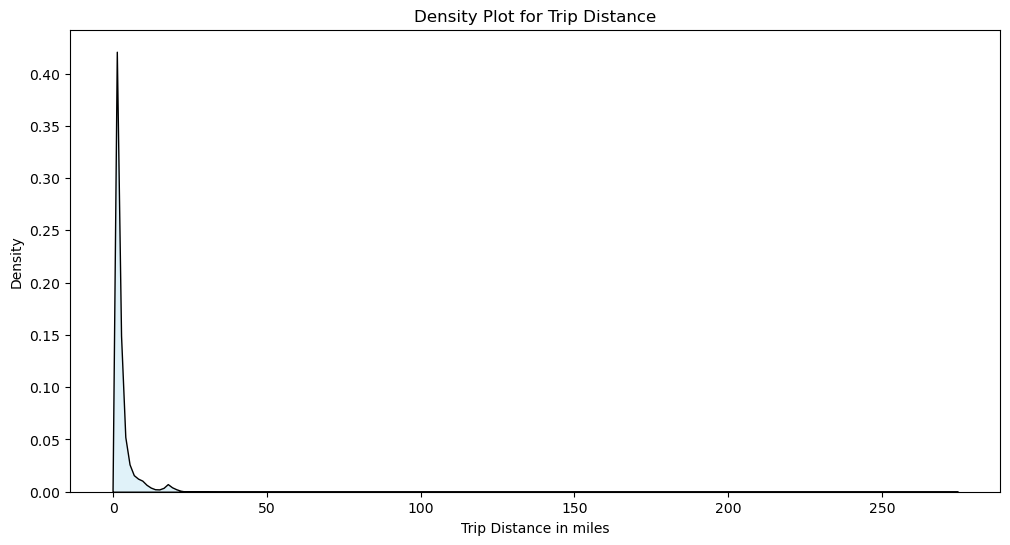

In [14]:
# Ensure trip distance is all positive
# Removing rows with negative trip_distance values
trip_distance_df = df[df['trip_distance'] >= 0]

# Plotting the density plot for trip_distance
plt.figure(figsize=(12, 6))
sns.kdeplot(trip_distance_df['trip_distance'], fill=True, bw_adjust=0.5, color='skyblue', edgecolor='black')

plt.title("Density Plot for Trip Distance")
plt.xlabel("Trip Distance in miles")
plt.ylabel("Density")

plt.show()

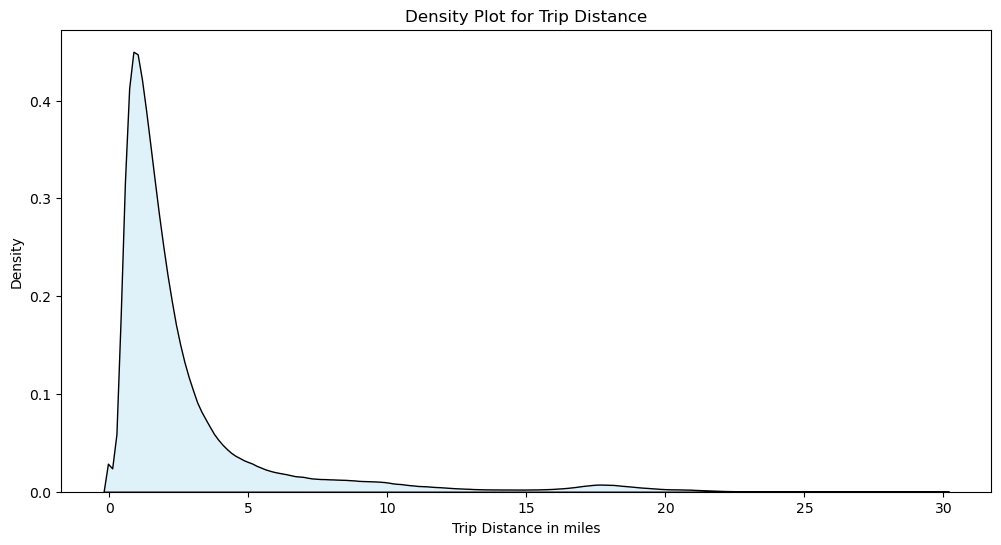

In [15]:
# Since most trip distance range from 0 to 30, we will narrow down our df and plot the density plot for trip distance again
# Filtering the dataframe to only include rows where trip_distance is between 0 and 30
filtered_trip_distance_df = trip_distance_df[trip_distance_df['trip_distance'].between(0, 30)]

# Plotting the density plot for the filtered trip_duration
plt.figure(figsize=(12, 6))
sns.kdeplot(filtered_trip_distance_df['trip_distance'], fill=True, bw_adjust=0.5, color='skyblue', edgecolor='black')

plt.title("Density Plot for Trip Distance")
plt.xlabel("Trip Distance in miles")
plt.ylabel("Density")
plt.savefig('../plots/trip_distance_density_all_location.png')
plt.show()

**Narrow down data set, ready for analysis**

Now we have an idea of what our data looks like, we can narrow our data set down so it is ready for analysis

* pickup_month only in 1,2,3
* trip_duration between 0 to 100 minutes
* trip_distance between 0 to 30 miles

In [16]:
# Filter by pickup_month
mask1 = df['pickup_month'].isin([1, 2, 3])

# Filter by trip_duration
mask2 = (df['trip_duration'] >= 0) & (df['trip_duration'] <= 100)

# Filter by trip_distance
mask3 = (df['trip_distance'] >= 0) & (df['trip_distance'] <= 30)

# Applying all masks
final_df = df[mask1 & mask2 & mask3]

final_df.to_csv('../data/curated/yellowtaxi_readyforanalysis_data.csv', index = False)